# Тестовая Задача. Номинация – Big Data.

# Weight and height research

__Источник__: данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

__Инструменты__: Python 3.5, jupyter notebook

1. Первичный анализ данных c Pandas

In [2]:
# Необходимые библиотеки
import numpy as np
import pandas as pd

import seaborn as sns

from scipy.optimize import minimize_scalar, minimize

import matplotlib.pyplot as plt
%matplotlib inline

### 1. Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [3]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

Посмотрим, как выглядят данные в DataFrame. 

In [4]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


### 2. Построим гистограмму распределения роста подростков

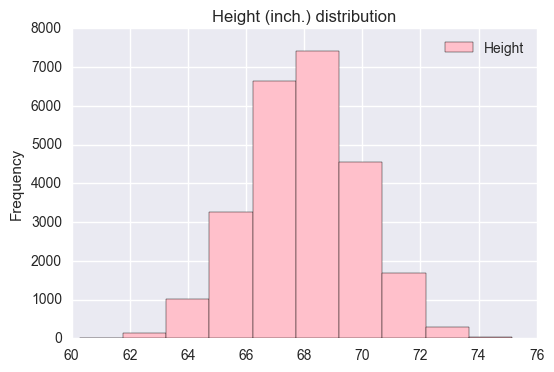

In [5]:
data.plot(y='Height', kind='hist', 
           color='pink',  title='Height (inch.) distribution')

### 2. Гистограмма распределения веса подростков

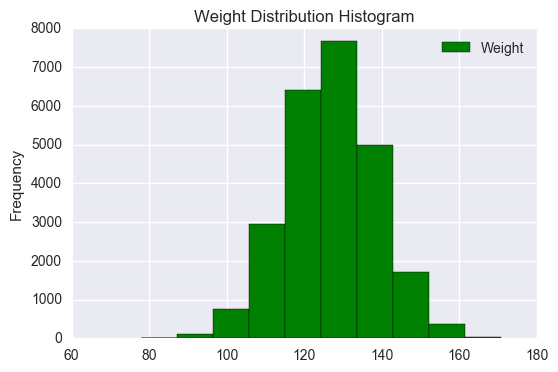

In [6]:
data.plot(x = 'Height', y = 'Weight', kind='hist', color = 'green', title = 'Weight Distribution Histogram')

### 3.1 Создадим признак *Индекс массы тела* BMI с помощью функции make_bmi.

Для этого воспользуемся коэффициентами перевода единиц с точностью до 5 знака после запятой.


In [7]:
# функция, считающая индекс массы тела BMI
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37008, 2.20462
    return (weight_pound / KILO_TO_POUND)/ \
           (height_inch / METER_TO_INCH) ** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

In [9]:
data.head(n=3)

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357647
2,71.51521,136.4873,18.762653
3,69.39874,153.0269,22.338986


### 3.2 Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга.

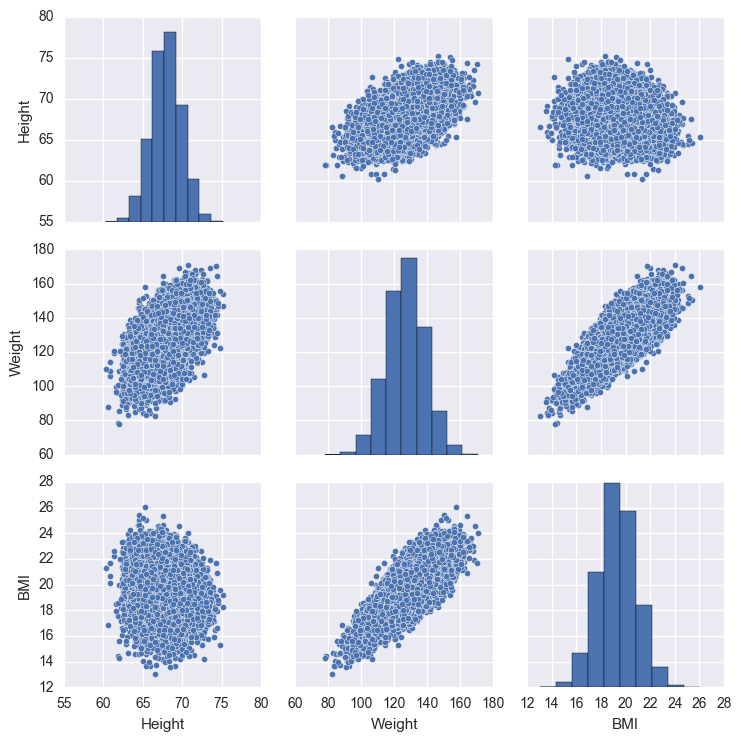

In [10]:
sns.pairplot(data, diag_kind = 'hist')

### 4. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. 

### Постройте boxplot, демонстрирующий зависимость роста от весовой категории. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

In [11]:
def weight_category(weight):
    if weight < 120:
        weight_cat = 1
    elif weight >= 150:
        weight_cat = 3
    else:
        weight_cat = 2
    return weight_cat

data['Weight_Category'] = data['Weight'].apply(weight_category)

Посмотрим, что все посчиталось правильно

In [12]:
data.head()

,Height,Weight,BMI,Weight_Category
Index,,,,
1,65.78331,112.9925,18.357647,1
2,71.51521,136.4873,18.762653,2
3,69.39874,153.0269,22.338986,3
4,68.21660,142.3354,21.504613,2
5,67.78781,144.2971,22.077671,2


Строим boxplot

[<matplotlib.text.Text at 0x11673c358>, <matplotlib.text.Text at 0x1166cbac8>]

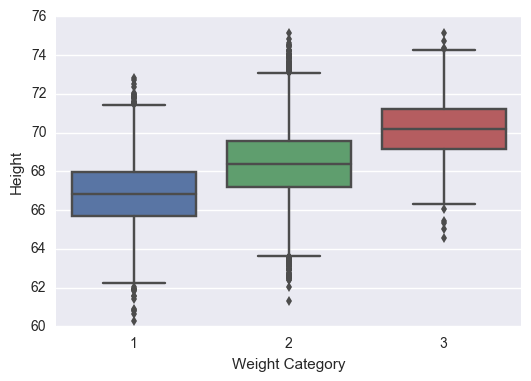

In [13]:
height_boxplot = sns.boxplot(x = 'Weight_Category', y = 'Height', data = data)
height_boxplot.set(xlabel='Weight Category', ylabel='Height')

### 5. Постройте scatter plot зависимости роста от веса. Подпишите картинку.

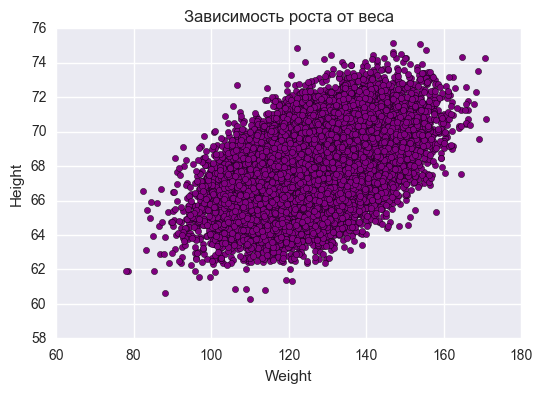

In [15]:
data.plot(x = 'Weight', y = 'Height', kind='scatter', color = 'purple', title = u'Зависимость роста от веса')

## Минимизация квадратичной ошибки


### 6. Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

### Функция квадратичной ошибки

In [25]:
def square_error_vector(w0, w1):
    return np.sum(
        [data.iloc[i]['Height'] - (w0 + w1 * data.iloc[i]['Weight']) ** 2
         for i in range(0, data.shape[0])],
        axis=0
    )

### 7. Проведите на графике из п. 5 две прямые, соответствующие значениям параметров 
$$(w_0, w_1) = (55, 0.04)$$ $$(w_0, w_1) = (50, 0.22)$$. 

Подпишите оси и график.

Зададим модель линейной регрессии как функцию:

### Функция линейной регрессии

In [26]:
def regression_model(w0, w1, x):
    return w0 + w1 * x

Определим функции с известными параметрами для $w_0 и w_1$

In [27]:
def a1(x):
    return regression_model(55, 0.04, x)

def a2(x):
    return regression_model(50, 0.22, x)

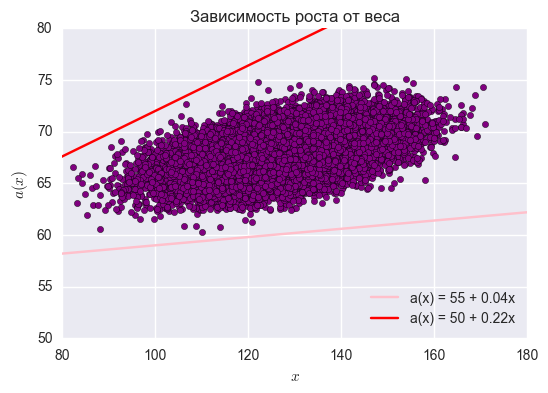

In [28]:
data.plot(x = 'Weight', y = 'Height', kind='scatter', color = 'purple', title = u'Зависимость роста от веса')

x = np.linspace(0, 180, 1000)

plt.plot(x, a1(x), label = 'a(x) = 55 + 0.04x', color = 'pink')
plt.plot(x, a2(x), label = 'a(x) = 50 + 0.22x', color = 'red')

plt.xlim(80, 180)
plt.ylim(50, 80)
plt.legend()
plt.legend(loc='lower right')
plt.ylabel('$a(x)$')
plt.xlabel('$x$')


### 8. Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

In [29]:
def square_error_vector_w1(w1):
    return square_error_vector(50, w1)

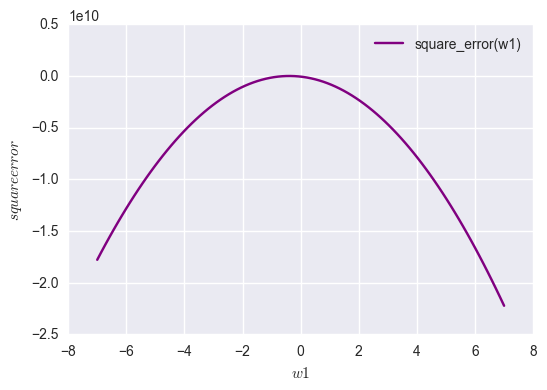

In [31]:
x = np.linspace(-7., 7., 100)
plt.plot(x, square_error_vector_w1(x), label = u'square_error(w1)', color = 'purple')

plt.legend()
plt.legend(loc='upper right')
plt.ylabel('$square error$')
plt.xlabel('$w1$')

### 9. Найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

Переопределим функцию ошибки square_error из п.6, чтобы она выдавала не вектор, а скаляр. (уберем условие axis = 0)
Это нужно для корректного применения метода minimize_scalar.

In [39]:
def square_error_scalar(w0, w1):
    return np.sum([(data.iloc[i]['Height'] - (w0 + w1 * data.iloc[i]['Weight'])) ** 2 
                   for i in range(0, data.shape[0])])

def square_error_scalar_w1(w1):
    return square_error_scalar(50, w1)

Посчитаем минимум по методу Brent с дефолтными параметрами

In [40]:
res_brent = minimize_scalar(square_error_scalar_w1)

In [41]:
res_brent

     fun: 79512.217286994986
    nfev: 6
     nit: 5
 success: True
       x: 0.1410920372883438

Посчитаем минимум по методу Bounded с ограничением для w1 [-5, 5]

In [42]:
res_bounded = minimize_scalar(square_error_scalar_w1, bounds=[-5, 5], method='bounded')

In [43]:
res_bounded

     fun: 79512.217286995001
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.14109203728834374

**Вывод:** результаты незначительно отличаются для методов brent и bounded

In [45]:
w1_opt = res_bounded.x
print('Соответственно, w1_opt = {}'.format(w1_opt))

Соответственно, w1_opt = 0.14109203728834374


### Определим линейную модель регрессии с известными нам теперь параметрами $w_0$ и $w_1$

In [46]:
def regression_model_w1_opt(x):
    return regression_model(50, w1_opt, x)

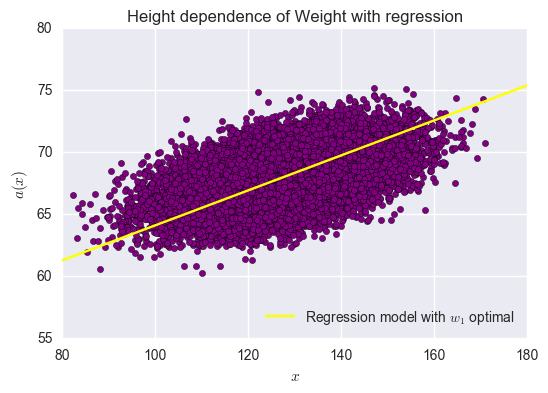

In [47]:
y = np.linspace(0, 180, 100)

data.plot(x = 'Weight', y = 'Height', kind='scatter', color = 'purple', 
          title = 'Height dependence of Weight with regression')
plt.plot(y, regression_model_w1_opt(y), label = 'Regression model with $w_1$ optimal', color = 'yellow')

plt.xlim(80, 180)
plt.ylim(55, 80)
plt.legend()
plt.legend(loc='lower right')
plt.ylabel('$a(x)$')
plt.xlabel('$x$')

In [48]:
from mpl_toolkits.mplot3d import Axes3D

### 10** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

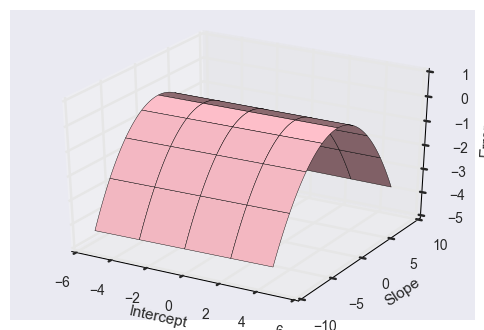

In [49]:
fig = plt.figure()
ax = fig.gca(projection='3d')

w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-10, 10, 0.25)
w0, w1 = np.meshgrid(w0, w1)

surf = ax.plot_surface(w0, w1, square_error_vector(w0, w1), color='pink')
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

### 11. Найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (Бройдена-Флетчера-Гольдфарба-Шанно). Проведите на графике из п. 5 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

Еще раз переопределим нашу скалярную функцию так, чтобы она принимала вектор $w = (w_0, w_1)$ как параметр, а не два отдельных параметра $w_0$ и $w_1$

In [50]:
def square_error_with_w_vect(w):
    return np.sum([(data.iloc[i]['Height'] - (w[0] + w[1] * data.iloc[i]['Weight'])) ** 2 
                   for i in range(0, data.shape[0])])

In [51]:
# (w0, w1) = (0, 0)
x0 = np.zeros(2)

#bounds for w0 [-100, 100] and w1 [-5, 5]
bnds = ((-100., 100.), (-5., 5.))

# minimization with L-BFGS-B method
res_L_BFGS_B = minimize(square_error_with_w_vect, x0, method='L-BFGS-B', bounds=bnds)

### Результат минимизации

In [52]:
res_L_BFGS_B

      fun: 67545.287086674711
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00291038,  0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 4
   status: 0
  success: True
        x: array([ 57.57179162,   0.08200637])

### Тогда модель линейной регрессии с параметрами, полученными из минимизации:

In [53]:
def opt_regression_model(x):
    return regression_model(res_L_BFGS_B.x[0], res_L_BFGS_B.x[1], x)

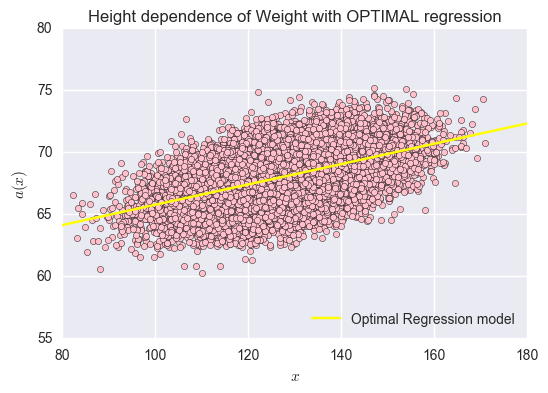

In [54]:
y = np.linspace(0, 180, 100)

data.plot(x = 'Weight', y = 'Height', kind='scatter', color = 'pink', 
          title = 'Height dependence of Weight with OPTIMAL regression')
plt.plot(y, opt_regression_model(y), label = 'Optimal Regression model', color = 'yellow')

plt.xlim(80, 180)
plt.ylim(55, 80)
plt.legend()
plt.legend(loc='lower right')
plt.ylabel('$a(x)$')
plt.xlabel('$x$')